yield curve

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime

In [6]:
yields = pd.read_csv('treasuryyield.csv')
yields.head()

,id,title/_type,updated,author/name,link/_rel,link/_title,link/_href,category/_term,category/_scheme,content/properties/Id/_m:type,...,content/properties/BC_30YEAR/_m:null,content/properties/BC_3MONTH/_m:null,content/properties/BC_6MONTH/_m:null,content/properties/BC_1YEAR/_m:null,content/properties/BC_2YEAR/_m:null,content/properties/BC_3YEAR/_m:null,content/properties/BC_5YEAR/_m:null,content/properties/BC_7YEAR/_m:null,content/properties/BC_10YEAR/_m:null,content/properties/BC_2MONTH/__text
0,http://data.treasury.gov/Feed.svc/DailyTreasur...,text,2019-07-28T19:12:48Z,NaN,edit,DailyTreasuryYieldCurveRateDatum,DailyTreasuryYieldCurveRateData(1),TreasuryDataWarehouseModel.DailyTreasuryYieldC...,http://schemas.microsoft.com/ado/2007/08/datas...,Edm.Int32,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,http://data.treasury.gov/Feed.svc/DailyTreasur...,text,2019-07-28T19:12:48Z,NaN,edit,DailyTreasuryYieldCurveRateDatum,DailyTreasuryYieldCurveRateData(2),TreasuryDataWarehouseModel.DailyTreasuryYieldC...,http://schemas.microsoft.com/ado/2007/08/datas...,Edm.Int32,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,http://data.treasury.gov/Feed.svc/DailyTreasur...,text,2019-07-28T19:12:48Z,NaN,edit,DailyTreasuryYieldCurveRateDatum,DailyTreasuryYieldCurveRateData(3),TreasuryDataWarehouseModel.DailyTreasuryYieldC...,http://schemas.microsoft.com/ado/2007/08/datas...,Edm.Int32,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,http://data.treasury.gov/Feed.svc/DailyTreasur...,text,2019-07-28T19:12:48Z,NaN,edit,DailyTreasuryYieldCurveRateDatum,DailyTreasuryYieldCurveRateData(4),TreasuryDataWarehouseModel.DailyTreasuryYieldC...,http://schemas.microsoft.com/ado/2007/08/datas...,Edm.Int32,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,http://data.treasury.gov/Feed.svc/DailyTreasur...,text,2019-07-28T19:12:48Z,NaN,edit,DailyTreasuryYieldCurveRateDatum,DailyTreasuryYieldCurveRateData(5),TreasuryDataWarehouseModel.DailyTreasuryYieldC...,http://schemas.microsoft.com/ado/2007/08/datas...,Edm.Int32,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


the data is pretty messy and has a lot of unnecessary columns. let's only include the columns that we need (and renamed them).

In [7]:
cols = ['content/properties/NEW_DATE/__text', 'content/properties/BC_3MONTH/__text', 'content/properties/BC_6MONTH/__text','content/properties/BC_1YEAR/__text',
       'content/properties/BC_2YEAR/__text', 'content/properties/BC_3YEAR/__text', 'content/properties/BC_5YEAR/__text', 'content/properties/BC_7YEAR/__text',
       'content/properties/BC_10YEAR/__text']

new_cols = ['DATE', '3MONTH','6MONTH','1YEAR','2YEAR','3YEAR','5YEAR','7YEAR','10YEAR']
yields = yields[cols]
yields.columns = new_cols

yields['DATE'] = yields['DATE'].str.replace(r'T00:.*','') # cleaning up date column

yields['DATE'] = pd.to_datetime(yields.DATE)

yields = yields.sort_values(by=['DATE']) # sorting the data by date

yields.head()

,DATE,3MONTH,6MONTH,1YEAR,2YEAR,3YEAR,5YEAR,7YEAR,10YEAR
1752,1990-01-02,7.83,7.89,7.81,7.87,7.90,7.87,7.98,7.94
1751,1990-01-03,7.89,7.94,7.85,7.94,7.96,7.92,8.04,7.99
1753,1990-01-04,7.84,7.90,7.82,7.92,7.93,7.91,8.02,7.98
1755,1990-01-05,7.79,7.85,7.79,7.90,7.94,7.92,8.03,7.99
1754,1990-01-08,7.79,7.88,7.81,7.90,7.95,7.92,8.05,8.02


We can now plot these yields to determine the relationship between yield curve inversions and economic recessions. The standard metric is an inversion of the 3 month treasury yield and the 10 year. We can plot this first.

(Idea for graph: y axis is yield curve inversion amount and x is time, with shading to show economic recessions. For each bond timeframe, subtract the 10 year rate from it (ex: 6MONTH - 10YEAR) and only keep the positive values for each (maybe replace all negatives by zero or just show positive half of graph.)

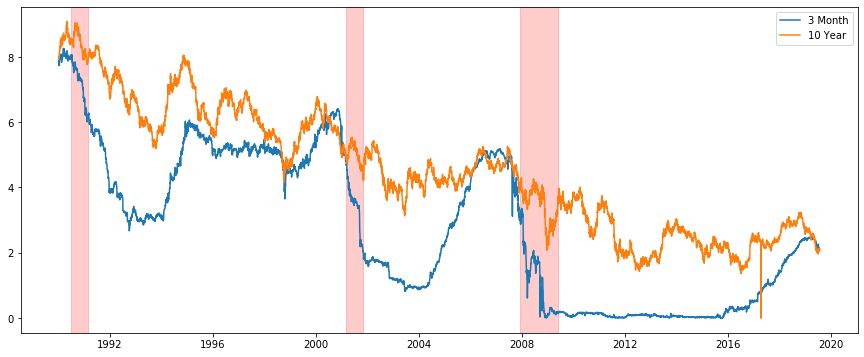

In [8]:
fig, ax = plt.subplots()
plt.rcParams['figure.figsize'] = (15,6)
ax.plot(yields['DATE'], yields['3MONTH'], label='3 Month')
ax.plot(yields['DATE'], yields['10YEAR'], label='10 Year')

'''
# create shaded boxes for yield inversions (not working yet)
for row in yields:
    if float(row[1]) - float(row[8]) > 0:
        ax.axvspan(row[0], row[0] + datetime.timedelta(days=1), alpha=0.2, color='blue')
'''


ax.axvspan(datetime.datetime(1990,7,1,0,0,0), datetime.datetime(1991,3,1,0,0,0), alpha=0.2, color='red')
ax.axvspan(datetime.datetime(2001,3,1,0,0,0), datetime.datetime(2001,11,1,0,0,0), alpha=0.2, color='red')
ax.axvspan(datetime.datetime(2007,12,1,0,0,0), datetime.datetime(2009,6,1,0,0,0), alpha=0.2, color='red')
plt.legend()
plt.show()